In [30]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit.models import GaussianModel, ExponentialModel, \
                         ConstantModel, StepModel #Modelli vari, l'ultimo è Fermi (o Bose)

from lmfit import Model

READ ME:
1) Inserire il proprio path dei dati da analizzare in una variabile apposita
2) Inserire tutti gli aggiustamenti che servono per fare il fit di un dato canale all'interno di un if


In [31]:
def load_histo(dat_PATH):
    data = np.loadtxt(dat_PATH, skiprows=0, comments='==')
    noises_edges = np.zeros((int(data.shape[0]/2), data.shape[1]))       #np.array([[]] * int(data.shape[0]/2))
    noises_values = np.zeros((int(data.shape[0]/2), data.shape[1]))       #np.array([[]] * int(data.shape[0]/2))

    for i in range(int(data.shape[0]/2)):
        noises_edges[i] = (data[2 * i])
        noises_values[i] = (data[2 * i + 1])

    return noises_edges, noises_values


def rebin(data, factor):
    if len(data) % factor != 0:
        raise ValueError("Length of data must be divisible by factor.")
    rebinned_data = np.sum(data.reshape(-1, factor), axis=1)
    return rebinned_data


In [32]:
PATH_SAM="../../../Dati/Spettri_Sam/Na/Run_Na_full_ChargeHistos_5_31_2024.dat"
edge_N, bin_N = load_histo(PATH_SAM)

    
edge_N = edge_N[0]
bin_N = bin_N[0]

rebin_fact = 2
bin_N = rebin(bin_N, rebin_fact)
tmp = []
for i in range(len(edge_N)):
    if(i % rebin_fact == 0):
        tmp.append(edge_N[i])

tmp.append(edge_N[-1])
edge_N = np.array(tmp)

centers_N = np.convolve(edge_N, [0.5, 0.5], "valid")
err_N = np.sqrt(bin_N)


Text(0, 0.5, 'counts')

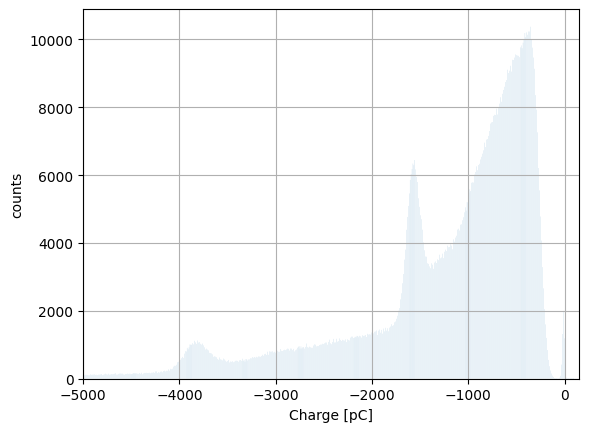

In [33]:
lim_N = [-5000, 150]
plt.bar(centers_N, bin_N, width = 1, snap = False, alpha = 1)
plt.xlim(lim_N)
plt.grid()
plt.xlabel("Charge [pC]")
plt.ylabel("counts")

In [34]:
err_N = err_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]
bin_N = bin_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]
centers_N = centers_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]

In [35]:
np.where(err_N == 0)

(array([], dtype=int64),)

In [36]:
#DEFINIAMO IL MODELLO
exp1   = ExponentialModel(prefix='e1_') #Esponenziale 
gauss1 = GaussianModel(prefix='g1_')    #Gaussiana
sigmoid1 = StepModel(form = "logistic", prefix = "s1_") #Sigmoide
sigmoid2 = StepModel(form = "logistic", prefix = "s2_") #Sigmoide


#DEFINIAMO IL MODELLO
Step1   = StepModel(prefix='fd1_', form = "logistic") #Esponenziale 
Step2   = StepModel(prefix='fd2_', form = "logistic") #Esponenziale 
Step3   = StepModel(prefix='fd3_', form = "logistic") #Esponenziale 
Step4   = StepModel(prefix='fd4_', form = "logistic") #Esponenziale 
Step5   = StepModel(prefix='fd5_', form = "logistic") #Esponenziale 



gauss  = GaussianModel(prefix='g1_')                    #Spikes 

gauss2  = GaussianModel(prefix='g2_')                   #Photopeak 
gauss3  = GaussianModel(prefix='g3_')                   #Photopeak 

sigmoid1 = StepModel(form = "logistic", prefix = "s1_") #Compton


params = Step1.guess(bin_N, x=centers_N)
params.update(Step2.guess(bin_N, x=centers_N))
params.update(exp1.guess(bin_N, x=centers_N))
params.update(Step3.guess(bin_N, x=centers_N))

params.update(sigmoid1.guess(bin_N, x=centers_N))
params.update(gauss.guess(bin_N, x=centers_N))

params.update(gauss2.guess(bin_N, x=centers_N))
params.update(Step4.guess(bin_N, x=centers_N))

params.update(gauss3.guess(bin_N, x=centers_N))
params.update(Step5.guess(bin_N, x=centers_N))


params["fd1_amplitude"].min = 0
params["fd2_amplitude"].min = 0
params["fd3_amplitude"].min = 0
params["fd4_amplitude"].min = 0
params["fd5_amplitude"].min = 0

params["e1_amplitude"].min = 0


params["fd1_center"].max= 0
params["fd2_center"].max= 0
params["fd3_center"].max= 0
params["fd4_center"].max= 0
params["fd5_center"].max= 0

params["g1_amplitude"].min= 0
params["g2_amplitude"].min= 0
params["g3_amplitude"].min= 0




params["fd1_center"].value = -1400
params["fd1_amplitude"].value = 670
params["fd1_sigma"].value = 40


params["fd2_amplitude"].value = 4600
params["fd2_center"].value = -710
params["fd2_sigma"].value = 180

params["fd3_amplitude"].value = 1000
params["fd3_center"].value = -400
params["fd3_sigma"].value = 50

params['e1_amplitude'].value = 1180
params['e1_decay'].value = -2100


params["s1_amplitude"].value = 1
params["s1_amplitude"].vary = False

params["s1_center"].value = -250  
params["s1_sigma"].value = 30

params["s1_center"].max = 0
params["s1_center"].min = -1000  

params["s1_sigma"].max = 100
params["s1_sigma"].min = 0


params["g1_center"].value = -13
params["g1_sigma"].value = 11
params["g1_height"].value = 1200

params["g1_center"].min = -40
params["g1_center"].max = 5

params["g2_center"].value = -1570
params["g2_height"].value = 2000
params["g2_sigma"].value = 68

params["fd4_amplitude"].value = 700
params["fd4_center"].value = -1200
params["fd4_sigma"].value = 45

params["fd4_center"].min = -1700
params["fd4_center"].max = -900



params["g3_center"].value = -3800
params["g3_height"].value = 380
params["g3_sigma"].value = 121


params["fd5_amplitude"].value = 700
params["fd5_center"].value = -3000
params["fd5_sigma"].value = 45

params["fd5_center"].min = -3700
params["fd5_center"].max = -2900


params["fd1_amplitude"].max = 2000


def const1(x):
    return 1


model = (Step1 + Step2 + Step3 + exp1 + gauss2 + Step4 + gauss3 + Step5) * (Model(const1) - sigmoid1) + gauss

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


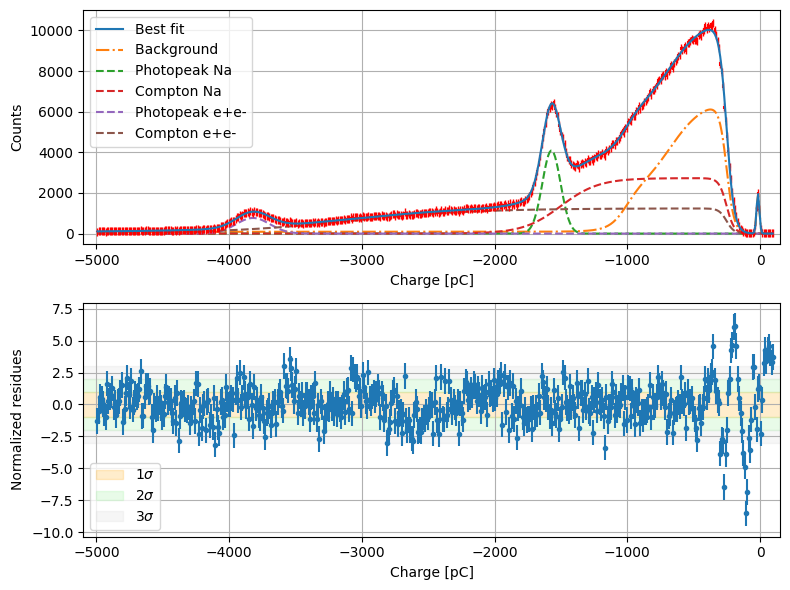

In [37]:
#FIT
result = model.fit(bin_N, params, x = centers_N, weights = 1 / err_N)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.set_xlabel('Charge [pC]')
ax1.set_ylabel('Counts')
ax1.legend()

comps = result.eval_components()                        #Plotto il best fit + le componenti

ax1.plot(centers_N, (comps['fd1_'] + comps['fd2_'] + comps['fd3_'] + comps['e1_'] + comps['g2_'] + comps['fd4_'] + comps['g3_'] + comps['fd5_']) * (1 - comps['s1_']) + comps['g1_'], label='Best fit', zorder = 10)
ax1.plot(centers_N, (comps['fd1_'] + comps['fd2_'] + comps['fd3_'] + comps['e1_']) * (1 - comps['s1_']) + comps['g1_'], label='Background ', ls = "-.")

ax1.plot(centers_N, comps['g2_'] * (1 - comps['s1_']), label='Photopeak Na', ls = "--")
ax1.plot(centers_N, comps['fd4_'] * (1 - comps['s1_']), label='Compton Na', ls = "--")

ax1.plot(centers_N, comps['g3_'] * (1 - comps['s1_']), label='Photopeak e+e-', ls = "--")
ax1.plot(centers_N, comps['fd5_'] * (1 - comps['s1_']), label='Compton e+e-', ls = "--")



ax1.legend()
ax1.errorbar(centers_N, bin_N, err_N, color = "red", fmt='|')
ax1.grid()

residueCs = bin_N - result.best_fit
norm_resCs = residueCs / err_N

ax2.errorbar(centers_N, norm_resCs, 1, ls = "", marker = ".")
ax2.grid()

ax2.set_xlabel('Charge [pC]')
ax2.set_ylabel('Normalized residues')

xlim = ax2.get_xlim()

ax2.fill_between(xlim, [-1, -1], [1, 1], color = "orange", alpha = 0.2, label = r'$1\sigma$')
ax2.fill_between(xlim, [-2, -2], [-1, -1], color = "lightgreen", alpha = 0.2, label = r'$2\sigma$')
ax2.fill_between(xlim, [1, 1], [2, 2], color = "lightgreen", alpha = 0.2)
ax2.fill_between(xlim, [2, 2], [3, 3], color = "lightgray", alpha = 0.2, label = r'$3\sigma$')
ax2.fill_between(xlim, [-3, -3], [-2, -2], color = "lightgray", alpha = 0.2)

ax2.legend()
fig.tight_layout()
ax1.set_xlim([-5100, 150])
ax2.set_xlim([-5100, 150])

plt.show()

In [38]:
print(result.fit_report())

[[Model]]
    (((((((((Model(step, prefix='fd1_', form='logistic') + Model(step, prefix='fd2_', form='logistic')) + Model(step, prefix='fd3_', form='logistic')) + Model(exponential, prefix='e1_')) + Model(gaussian, prefix='g2_')) + Model(step, prefix='fd4_', form='logistic')) + Model(gaussian, prefix='g3_')) + Model(step, prefix='fd5_', form='logistic')) * (Model(const1) - Model(step, prefix='s1_', form='logistic'))) + Model(gaussian, prefix='g1_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58000
    # data points      = 500
    # variables        = 28
    chi-square         = 1265.57373
    reduced chi-square = 2.68130027
    Akaike info crit   = 520.336369
    Bayesian info crit = 638.345396
    R-squared          = 0.99999968
##  Warning: uncertainties could not be estimated:
[[Variables]]
    fd1_amplitude:  0.02020991 (init = 670)
    fd1_center:    -576.675126 (init = -1400)
    fd1_sigma:      1472.23087 (init = 40)
    fd2_amplitude:  1794.809